Epoch [1/50], Loss: 1.2581, Train Acc: 0.3333, Test Acc: 0.3000
Epoch [2/50], Loss: 1.2543, Train Acc: 0.3333, Test Acc: 0.3000
Epoch [3/50], Loss: 1.2507, Train Acc: 0.3333, Test Acc: 0.3000
Epoch [4/50], Loss: 1.2471, Train Acc: 0.3333, Test Acc: 0.3333
Epoch [5/50], Loss: 1.2435, Train Acc: 0.3333, Test Acc: 0.3333
Epoch [6/50], Loss: 1.2399, Train Acc: 0.3333, Test Acc: 0.3333
Epoch [7/50], Loss: 1.2364, Train Acc: 0.3333, Test Acc: 0.3333
Epoch [8/50], Loss: 1.2330, Train Acc: 0.3333, Test Acc: 0.3333
Epoch [9/50], Loss: 1.2295, Train Acc: 0.3417, Test Acc: 0.3333
Epoch [10/50], Loss: 1.2262, Train Acc: 0.3417, Test Acc: 0.3333
Epoch [11/50], Loss: 1.2228, Train Acc: 0.3417, Test Acc: 0.3333
Epoch [12/50], Loss: 1.2195, Train Acc: 0.3417, Test Acc: 0.3333
Epoch [13/50], Loss: 1.2162, Train Acc: 0.3417, Test Acc: 0.3333
Epoch [14/50], Loss: 1.2130, Train Acc: 0.3417, Test Acc: 0.3333
Epoch [15/50], Loss: 1.2098, Train Acc: 0.3417, Test Acc: 0.3333
Epoch [16/50], Loss: 1.2066, Train

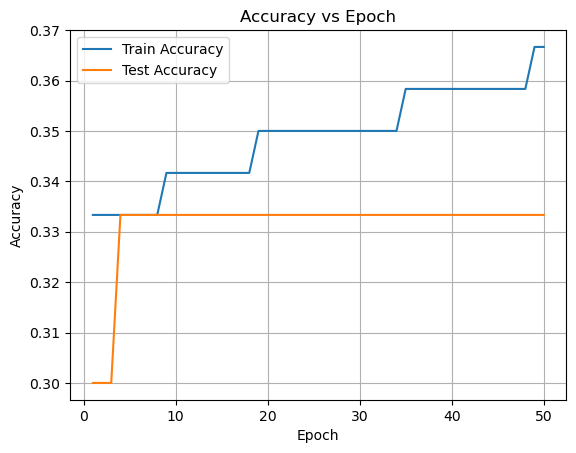

In [7]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim 
from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data
y = iris.target

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Define the model
class TwoLayerNN(nn.Module):
    def __init__(self):
        super(TwoLayerNN, self).__init__()
        self.fc1 = nn.Linear(4, 10)
        self.fc2 = nn.Linear(10, 3)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = TwoLayerNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
epochs = 50

train_acc_list = []
test_acc_list = []

for epoch in range(epochs):
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        train_preds = torch.argmax(model(X_train_tensor), dim=1)
        test_preds = torch.argmax(model(X_test_tensor), dim=1)
        train_acc = (train_preds == y_train_tensor).float().mean().item()
        test_acc = (test_preds == y_test_tensor).float().mean().item()

    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}")

plt.plot(range(1, epochs+1), train_acc_list, label='Train Accuracy')
plt.plot(range(1, epochs+1), test_acc_list, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epoch')
plt.legend()
plt.grid(True)
plt.savefig("accuracy_plot.png")

In [2]:
import torch
print(torch.__version__)
print("CUDA Available:", torch.cuda.is_available())


2.5.1
CUDA Available: False
